In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
##sns.pairplot(df)

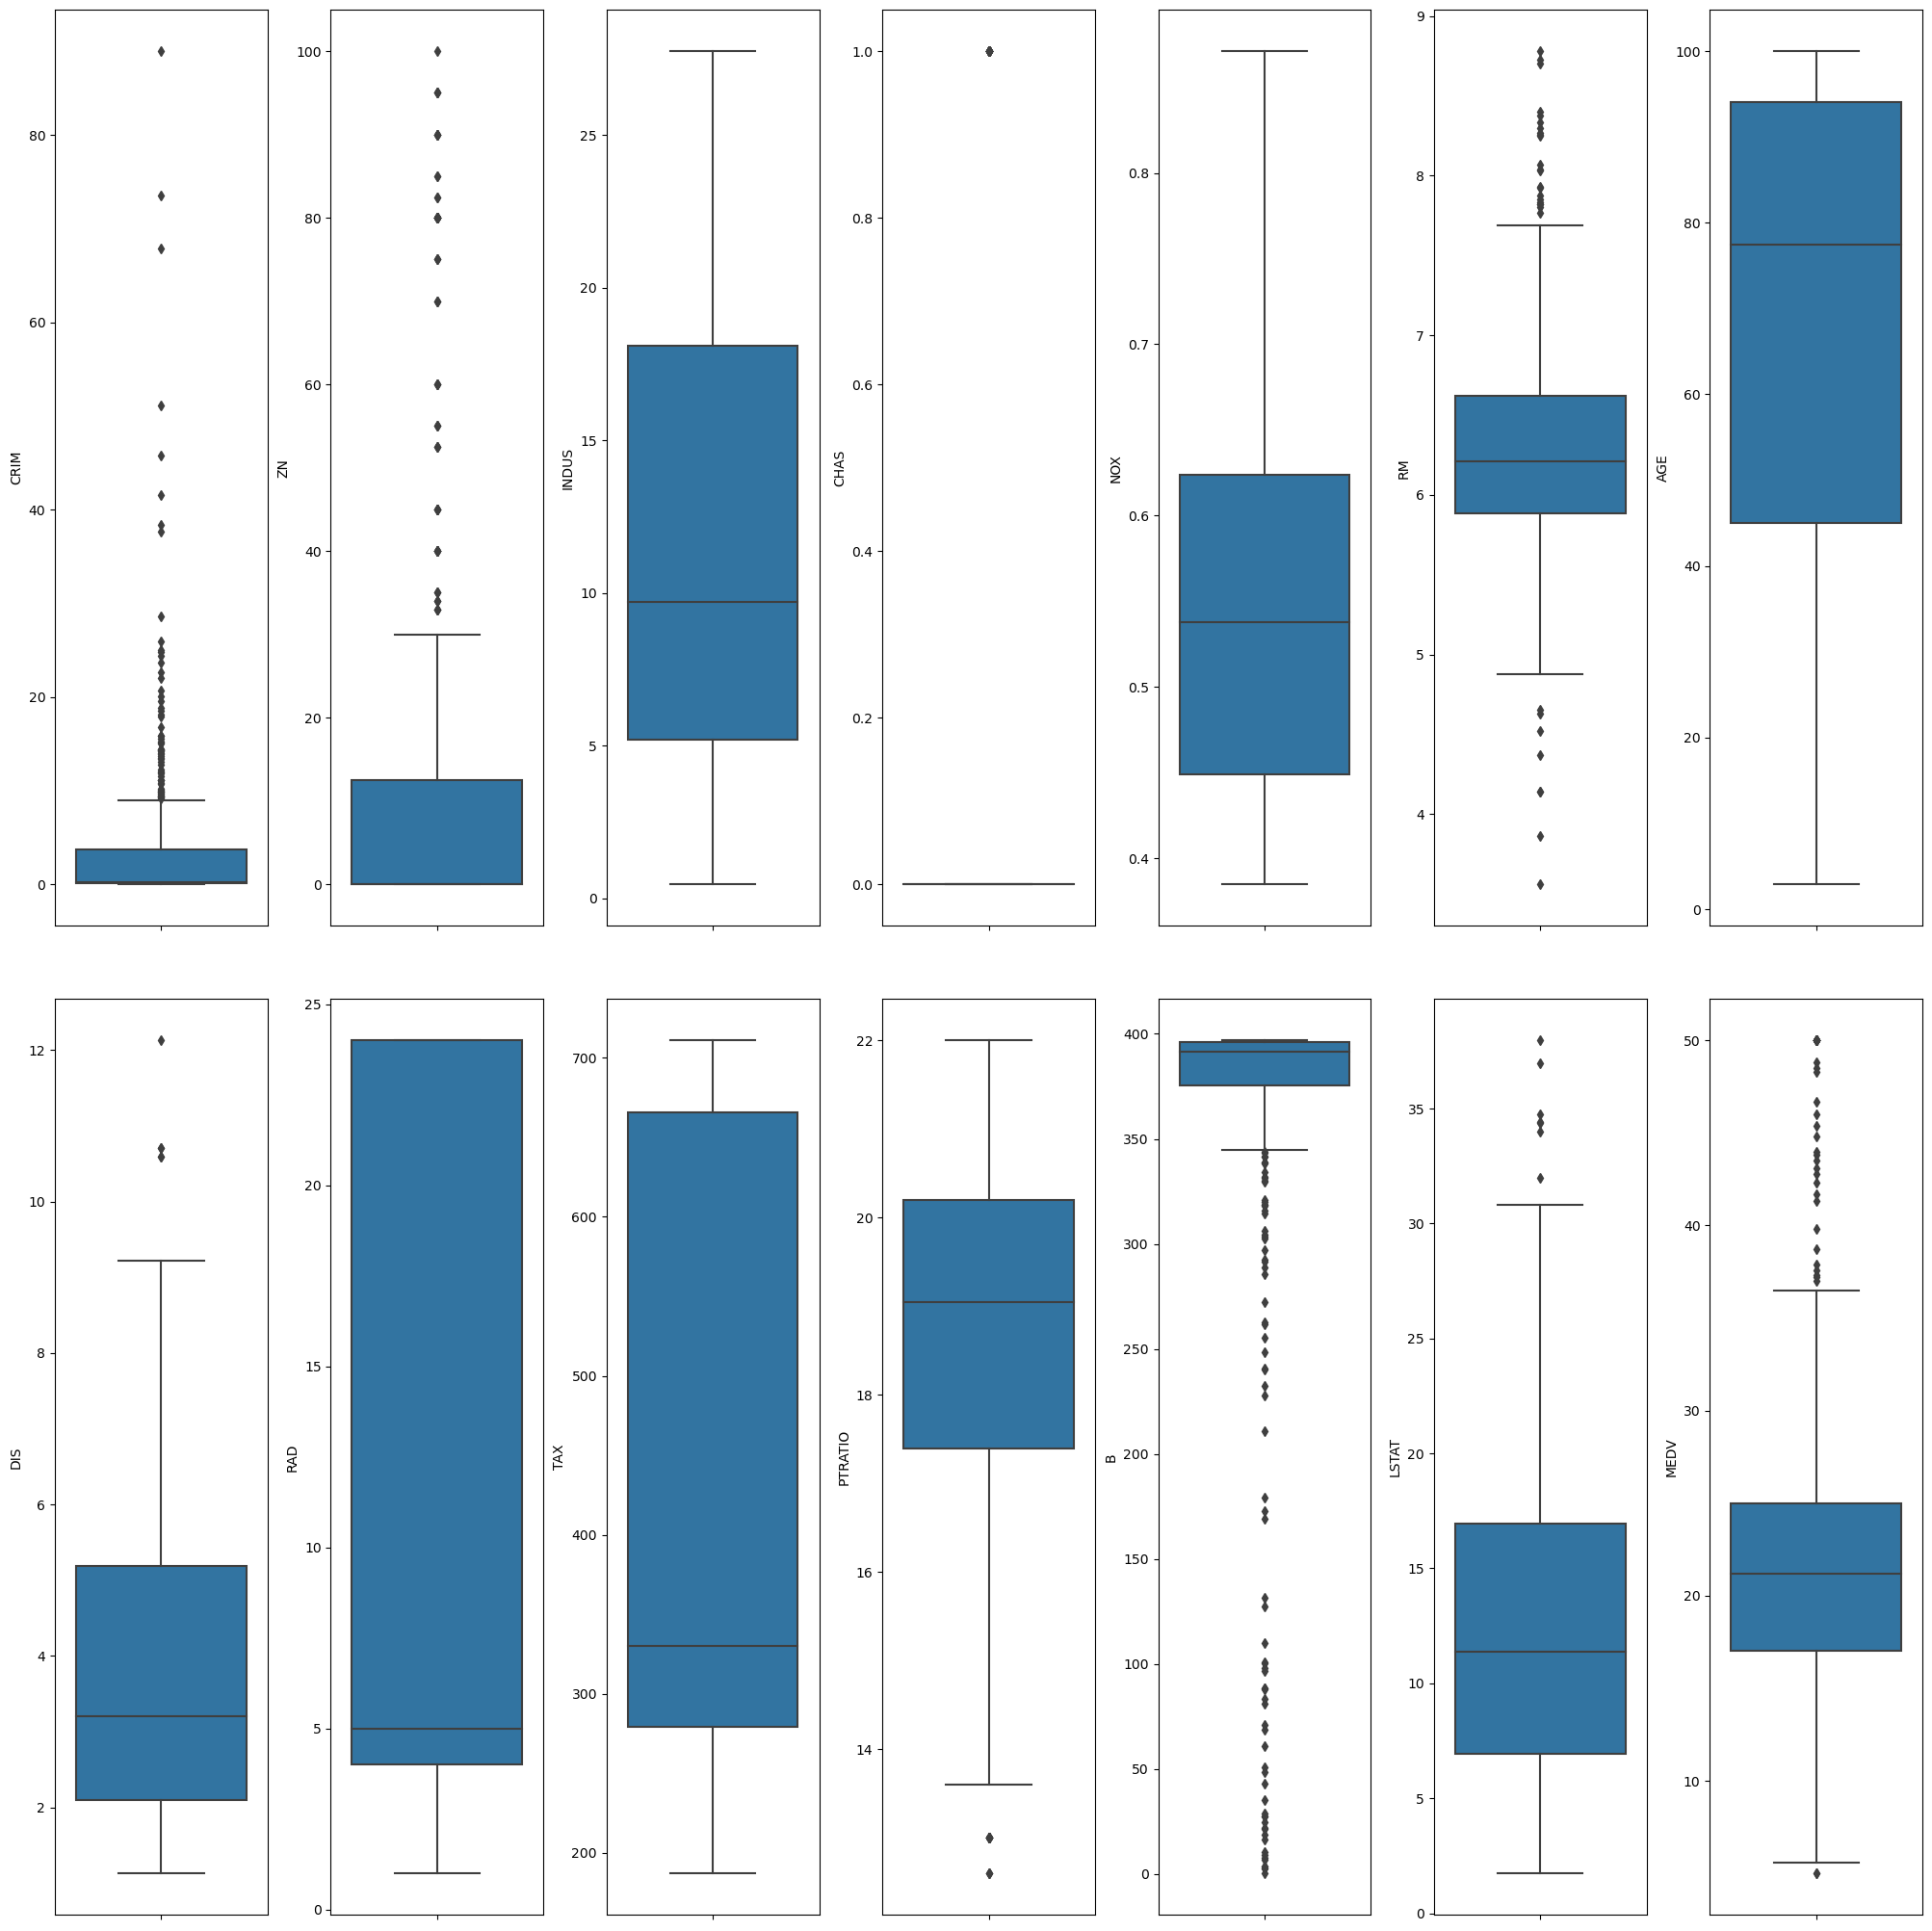

In [7]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,20))
ax=ax.flatten()
index=0
for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)    


In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [9]:
x.shape,y.shape

((506, 13), (506,))

In [10]:
ss=StandardScaler()
ss.fit_transform(x)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [13]:
###LinearRegression

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
model.score(x_train,y_train)

0.7508856358979673

In [16]:
train_pred=model.predict(x_train)

In [17]:
print('mae:',mean_absolute_error(y_train,train_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_train,train_pred)))
print('r2:',r2_score(y_train,train_pred))

mae: 3.3147716267832346
rmse: 1.8206514292371383
r2: 0.7508856358979673


Text(0, 0.5, 'train_pred')

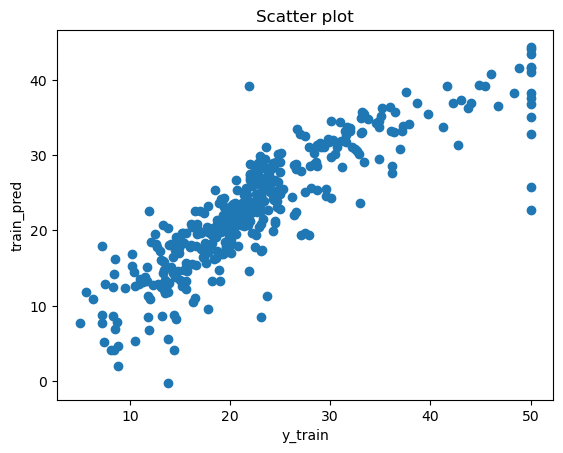

In [18]:
plt.scatter(y_train,train_pred)
plt.title('Scatter plot')
plt.xlabel('y_train')
plt.ylabel('train_pred')

In [19]:
test_pred=model.predict(x_test)


In [20]:
print('mae:',mean_absolute_error(y_test,test_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,test_pred)))
print('r2:',r2_score(y_test,test_pred))

mae: 3.1890919658878745
rmse: 1.7858028911074912
r2: 0.6687594935356294


Text(0, 0.5, 'test_pred')

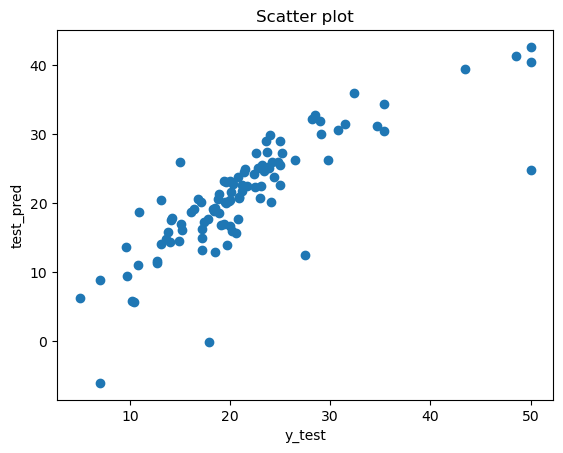

In [21]:
plt.scatter(y_test,test_pred)
plt.title('Scatter plot')
plt.xlabel('y_test')
plt.ylabel('test_pred')

In [22]:
### Decison Tree

In [23]:
model_dt=DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [24]:
model_dt.score(x_train,y_train)

1.0

In [25]:
dt_train_pred=model_dt.predict(x_train)

In [26]:
print('mae:',mean_absolute_error(y_train,dt_train_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_train,dt_train_pred)))
print('r2:',r2_score(y_train,dt_train_pred))

mae: 0.0
rmse: 0.0
r2: 1.0


Text(0, 0.5, 'dt_train_pred')

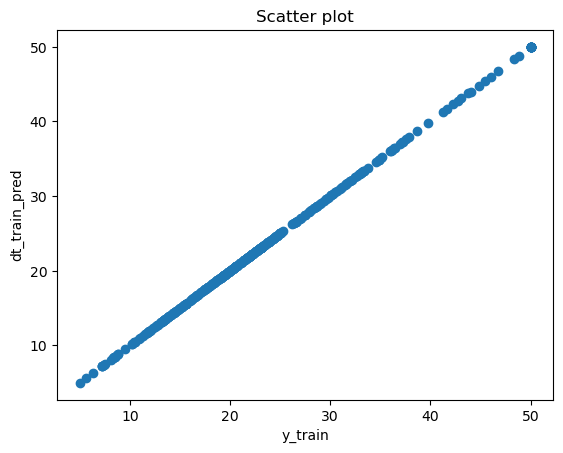

In [27]:
plt.scatter(y_train,dt_train_pred)
plt.title('Scatter plot')
plt.xlabel('y_train')
plt.ylabel('dt_train_pred')

In [28]:
dt_test_pred=model_dt.predict(x_test)

In [29]:
print('mae:',mean_absolute_error(y_test,dt_test_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,dt_test_pred)))
print('r2:',r2_score(y_test,dt_test_pred))

mae: 2.8911764705882357
rmse: 1.7003459855535978
r2: 0.6768856718242842


Text(0, 0.5, 'dt_test_pred')

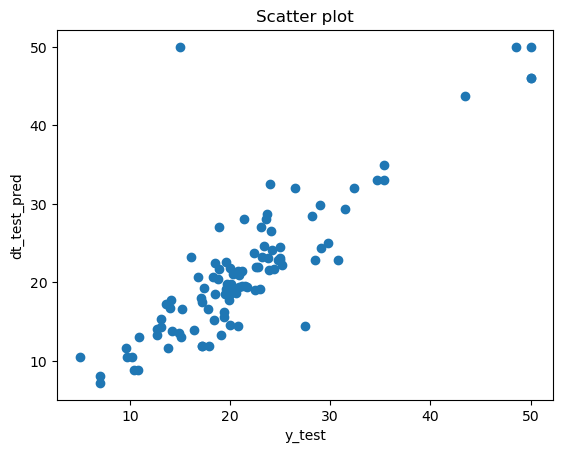

In [30]:
plt.scatter(y_test,dt_test_pred)
plt.title('Scatter plot')
plt.xlabel('y_test')
plt.ylabel('dt_test_pred')

In [31]:
##RandomForestRegressor

In [32]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
model_rf.score(x_train,y_train)

0.9767417536259073

In [34]:
rf_train_pred=model_rf.predict(x_train)

In [35]:
print('mae:',mean_absolute_error(y_train,rf_train_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_train,rf_train_pred)))
print('r2:',r2_score(y_train,rf_train_pred))

mae: 0.8931188118811882
rmse: 0.9450496346124834
r2: 0.9767417536259073


Text(0, 0.5, 'rf_train_pred')

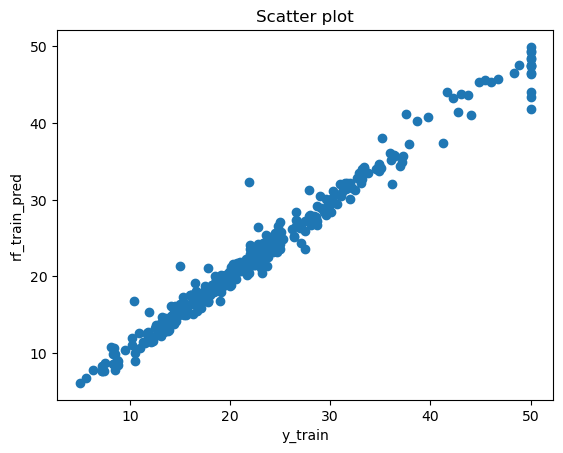

In [36]:
plt.scatter(y_train,rf_train_pred)
plt.title('Scatter plot')
plt.xlabel('y_train')
plt.ylabel('rf_train_pred')

In [37]:
rf_test_pred=model_rf.predict(x_test)

In [38]:
print('mae:',mean_absolute_error(y_test,rf_test_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,rf_test_pred)))
print('r2:',r2_score(y_test,rf_test_pred))

mae: 2.0760980392156854
rmse: 1.4408671136561086
r2: 0.8823774952937534


Text(0, 0.5, 'rf_test_pred')

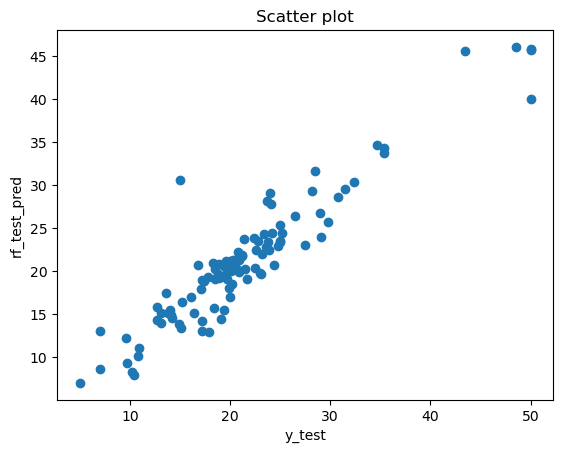

In [39]:
plt.scatter(y_test,rf_test_pred)
plt.title('Scatter plot')
plt.xlabel('y_test')
plt.ylabel('rf_test_pred')

In [40]:
residual=y_test-test_pred
residual

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: MEDV, Length: 102, dtype: float64

In [47]:
r2=residual*residual
r2.me

173     29.124626
274     13.144724
491      1.480953
72       4.981731
452      7.128259
          ...    
412    326.316658
436     16.686137
411      1.033075
86       0.050077
75       9.480387
Name: MEDV, Length: 102, dtype: float64

In [41]:
residual_dt=y_test-dt_test_pred
residual_dt

173   -4.5
274    0.4
491   -3.7
72     0.8
452   -7.1
      ... 
412    6.0
436   -2.1
411    5.3
86     3.5
75    -6.7
Name: MEDV, Length: 102, dtype: float64

In [42]:
residual_rf=y_test-rf_test_pred
residual_rf

173    0.744
274    2.069
491   -3.871
72    -0.676
452   -0.859
       ...  
412    4.917
436   -2.605
411    2.936
86     2.172
75    -2.319
Name: MEDV, Length: 102, dtype: float64